## Analysis of an E-Commerce Dataset
### Introduction   
### Part 1.
The dataset contains records on users' product ratings and reviews on an e-commerce platform. Auser may rate multiple items and an item may receive ratings and reviews from multiple users. Users can also evaluate each other's ratings and reviews.   

This dataset includes details about:   
- **User profile**: ID, gender, city of birth   
- **Ratings & Reviews**: ratings (on a scale of 1-5), reviews, timestamp, average helpfulness of the rating given by others (on a scale of 1-5)   
- **Product**: product name, ID, price, category

Below are the descriptions of the columns of this dataset:   

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating.
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth   

### Part 1. EDA
1. Remove records where:
 * gender/rating/helpfulness is missing
 * review is 'none'

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# import csv file
ec = pd.read_csv('E-commerce Dataset (p1).csv')

# display dataframe - before 
ec.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [36]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [37]:
# count Null values - before
print(f"Total number of null values by variable:\n{ec.isnull().sum()}")

# print length before removing records
print(f"\nTotal number of records: {len(ec)}")

Total number of null values by variable:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

Total number of records: 20000


In [38]:
# remove missing data - as the percentage is < 5%
ec_clean = ec.dropna()
ec_clean = ec_clean[ec_clean.review != 'none']

# print length after
print(len(ec_clean))

19916


In [39]:
## Total number of unique users, reviews, items, and categories
print("Number of unique users:", ec_clean.userId.nunique())
print("Number of unique reviews:", ec_clean.review.nunique())
print("Number of unique items:", ec_clean.item.nunique())
print("Number of unique categories:", ec_clean.category.nunique())

Number of unique users: 8562
Number of unique reviews: 19459
Number of unique items: 89
Number of unique categories: 9


In [40]:
## Descriptive stats for all rating records
ec_clean["rating"].describe().round(2)

count    19916.0
mean         3.7
std          1.4
min          1.0
25%          3.0
50%          4.0
75%          5.0
max          5.0
Name: rating, dtype: float64

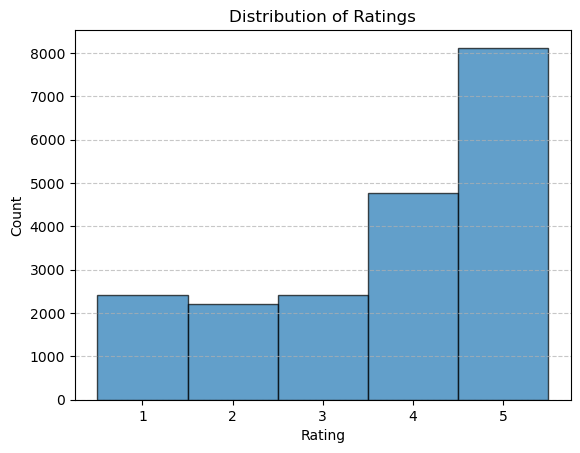

In [41]:
# Plot histogram with bins for each rating (1 to 5)
plt.hist(ec_clean["rating"], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks([1, 2, 3, 4, 5])  # Ensure the x-axis only has integer values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [42]:
## count of items rated, group by gender
ec_clean.groupby("gender")["item"].count()

gender
F     9793
M    10123
Name: item, dtype: int64

In [43]:
## count of ratings, group by items
ec_clean.groupby("item")["rating"].count()

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Name: rating, Length: 89, dtype: int64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Text(0, 0.5, 'Rating')

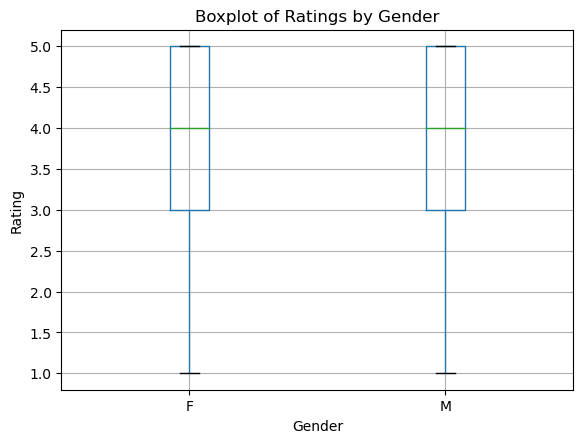

In [44]:
# boxplot for gender vs rating 
ec_clean.boxplot('rating', by='gender').get_figure().suptitle('')
plt.title('Boxplot of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')

### Analysis
We can see from the boxplot that the distribution and spread of both genders are the same. This means that there is no correlation between gender and rating, in other words, rating doesn't depend on gender.

Text(0, 0.5, 'Rating')

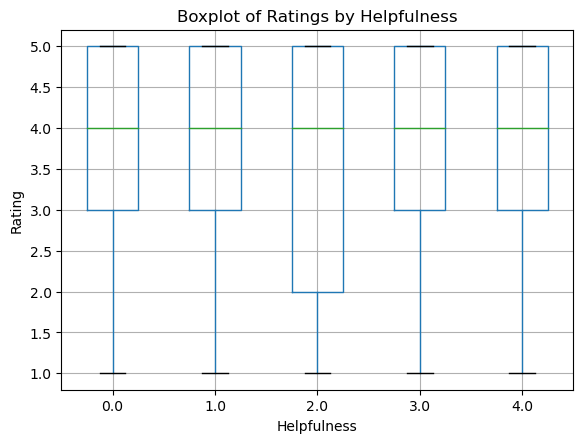

In [45]:
# boxplot for helpfulness vs rating
ec_clean.boxplot('rating', by='helpfulness').get_figure().suptitle('')
plt.title('Boxplot of Ratings by Helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')

### Analysis
The boxplot shows that there is also little correlation between helpfulness rating and product rating, based on the similar distributions and spreads. Most people rate the helpfulness of ratings between 3.0 and 5.0. For helpfulness rating of 2.0, the distribution is a bit different, ranging from 2.0 to 5.0 instead of 3.0 to 5.0 like other helpfulness rating.

Text(0, 0.5, 'Rating')

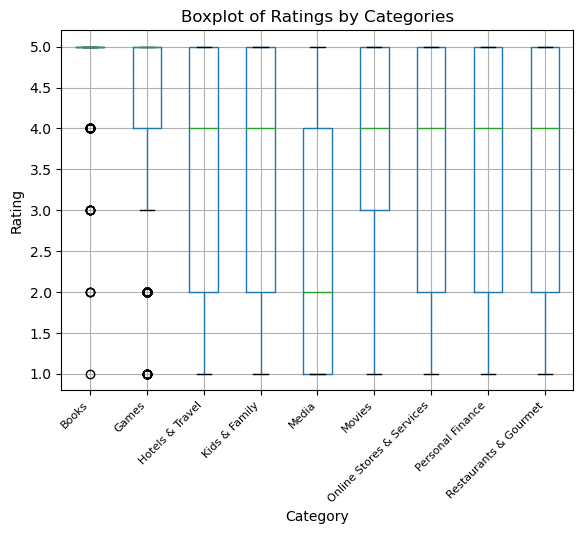

In [46]:
# category vs rating
ec_clean.boxplot('rating', by='category').get_figure().suptitle('')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Boxplot of Ratings by Categories')
plt.xlabel('Category')
plt.ylabel('Rating')

### Analysis
The plot shows the correlation of category and rating. The ratings are different between the categories, so there is correlation between the two.
- For Books: people rate really high for this category, with most are 5.0 rating. 
- For Games: people also rate quite high in this category, with the distribution ranging from 4.0 to 5.0, with some outliers of 1.0 and 2.0.
- For Media: this is the category that receives the lowest rating. The distribution of the rating is from 1.0 to 4.0, with 50% of the ratings are between 1.0 to 2.0. 
- For Movies: again, the ratings are quite high, with the distribution ranging from 3.0 to 5.0.
- The remaining categories have similar spreads and distributions.

### Summary of the data
- This dataset contains 20000 records, but after removing null values, there are only 19916 records left, which is a relatively small dataset.
- There are a total of 8562 customers, 19459 reviews for 89 items, and 9 categories. 
- The average rating that people give is 3.7. The average helpfulness rating is lower, at 2.6.
- Helpfulness rating and gender don't affect the ratings of items. However, there are some differences in ratings between different categories. 

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [47]:
# your code and solutions
# rule 1
ec1 = ec_clean[~(ec_clean.helpfulness <= 2)]
ec1.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22


In [48]:
# rule 2
# create a df with users and the number of times they rate
r2 = (ec1.groupby('userId')['item'].count()).reset_index()

# choose rows with users rate < 7 times
r2 = r2[(r2.item < 7)]

# create a list of userId who rate < 7 times
r2Id = r2.userId.tolist()

# drop outliers
ec2 = ec1[~(ec1.userId.isin(r2Id))]
ec2.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [49]:
# rule 3 
# create a df with items and the number of ratings they receive
r3 = (ec2.groupby('item')['rating'].count()).reset_index()

# choose rows with # of ratings < 11
r3 = r3[(r3.rating < 11)]

# create a list of items that have < 11 ratings
r3Id = r3.item.tolist()

# drop outliers
ec3 = ec2[~(ec2.item.isin(r3Id))]
ec3.head()

# print length of the final df
print(len(ec3))

2685


### Part 2. Building Models
- Linear Regression
- KNN

1. Linear Regression   
The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

In [50]:
# Find correlation between helpfulness/gender/category/review and rating

## Convert categorical columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ec_clean[['gender', 'category', 'review']] = enc.fit_transform(ec_clean[['gender', 'category', 'review']])
ec_clean.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,6961.0,eBay,5.0,2.0,0.0,6.0,88,149.00,39
1,4052,122899,5685.0,NetZero,5.0,0.0,0.0,6.0,46,53.00,39
2,33,12700,1473.0,AOL (America Online),5.0,4.0,0.0,6.0,0,145.84,31
3,33,21000,4692.0,eBay,5.0,4.0,0.0,6.0,88,149.00,31
4,33,22300,3164.0,Blair Witch Project,1.0,4.0,0.0,5.0,12,44.00,31


In [51]:
## Find correlation
ec_clean[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

,helpfulness,gender,category,review,rating
helpfulness,1.000000,0.005344,-0.040379,-0.017907,-0.000319
gender,0.005344,1.000000,0.007477,-0.005361,-0.010963
category,-0.040379,0.007477,1.000000,-0.002640,-0.131884
review,-0.017907,-0.005361,-0.002640,1.000000,-0.019023
rating,-0.000319,-0.010963,-0.131884,-0.019023,1.000000


### Analysis of Correlations
- Overall, all 4 features have very weak and negative correlations with rating  
=> This is similar to what we found from boxplots of these features and rating in Portfolio 1. 
- The most correlated feature regarding rating: category (-0.163)
- The least correlated feature regarding rating: helpfulness (-0.008)
- Because of their weak correlations, these features are not useful in predicting rating, and therefore will result in incorrect prediction results. If we train a regression model on these features, the model probably will not follow linear regression and the points will be very scattered.  

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [52]:
from sklearn.model_selection import train_test_split

# Case 1
train1, test1 = train_test_split(ec_clean, test_size=0.9)
print(train1.shape)
print(test1.shape)

(1991, 11)
(17925, 11)


In [53]:
# Case 2
train2, test2 = train_test_split(ec_clean, test_size=0.1)
print(train2.shape)
print(test2.shape)

(17924, 11)
(1992, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d). 

In [54]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [55]:
# model-a 
X_train_a = train1[['category', 'review']]
y_train_a = train1['rating']

X_test_a = test1[['category', 'review']]
y_test_a = test1['rating']

reg.fit(X_train_a, y_train_a)

LinearRegression()

# model-b
X_train_b = train1[['helpfulness', 'gender']]
y_train_b = train1['rating']

X_test_b = test1[['helpfulness', 'gender']]
y_test_b = test1['rating']

reg.fit(X_train_b, y_train_b)

In [ ]:
# model-c 
X_train_c = train2[['category', 'review']]
y_train_c = train2['rating']

X_test_c = test2[['category', 'review']]
y_test_c = test2['rating']

reg.fit(X_train_c, y_train_c)

# model-d
X_train_d = train2[['helpfulness', 'gender']]
y_train_d = train2['rating']

X_test_d = test2[['helpfulness', 'gender']]
y_test_d = test2['rating']

reg.fit(X_train_d, y_train_d)

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [ ]:
# model-a
predicted_a = reg.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
print("MSE:", mse_a)
print("Root MSE", np.sqrt(mse_a))

# model-b
predicted_b = reg.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
print("MSE:", mse_b)
print("Root MSE", np.sqrt(mse_b))

# model-c
predicted_c = reg.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
print("MSE:", mse_c)
print("Root MSE", np.sqrt(mse_c))

In [ ]:
# model-d
predicted_d = reg.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
print("MSE:", mse_d)
print("Root MSE", np.sqrt(mse_d))

### Evaluate models
- Case 2 models (c & d) have smaller MSE and Root MSE compared with Case 1 models (a & b)
- Both MSE and Root MSE are smaller with the models that use the 2 most correlated variables (models a & c)  

=> Performances of the models from best to worst: c, a, d, b  
=> We can say that the bigger the training data the better (with case 2, the training data is 90% of the entire data), and we should use the most correlated features for predictions   

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [ ]:
# create df for visualisation
## for mse
v1 = [['model-a', mse_a], ['model-b', mse_b], ['model-c', mse_c], ['model-d', mse_d]]
df1 = pd.DataFrame(v1, columns=['Model', 'MSE'])
## for root mse
v2 = [['model-a', np.sqrt(mse_a)], ['model-b', np.sqrt(mse_b)], ['model-c', np.sqrt(mse_c)], ['model-d', np.sqrt(mse_d)]]
df2 = pd.DataFrame(v2, columns=['Model', 'Root MSE'])

# visualisation
plt.figure(figsize=(16,6))
## mse
plt.subplot(1,2,1)
plt.title('MSE Values of 4 Models')
plt.ylim(1.6, 1.9)
sns.barplot(df1, x='Model', y='MSE')
## root mse
plt.subplot(1,2,2)
plt.title('Root MSE of 4 Models')
plt.ylim(1.2, 1.5)
sns.barplot(df2, x='Model', y='Root MSE')

### Analysis
- Based on the barplots above, model **a** and **c** have lower MSE and Root MSE compared to model **b** and **d**  
=> This makes sense, as model **b** and **d** use 2 least correlated features to predict 'rating'.
- Model **d** has the highest MSE and Root MSE even though it is trained on the larger training data (case 2). A possible explanation can be that because model **d** uses the 2 least correlated features, the effect of those unhelpful features are magnified by the larger data. 
- Model **c** has the best performance: it uses 2 most correlated features and has more training data.
- However, MSE and Root MSE values from all 4 models are much higher than 0, suggesting that all models are not useful in predicting 'rating'.   

### 2. Logistic Regression Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# encoding
ec.review = LabelEncoder().fit_transform(ec.review)
ec.item = LabelEncoder().fit_transform(ec.item)
ec.gender = LabelEncoder().fit_transform(ec.gender)
ec.category = LabelEncoder().fit_transform(ec.category)

ec.head()

In [ ]:
# correlation - all variables have low correlation with ratings
ec.corr()

In [ ]:
# build model
# train & test split
train, test = train_test_split(ec, test_size = 0.2, random_state = 142)
print(train.shape)
print(test.shape)

In [ ]:
# fit model on train dataset - without feature selection
X_train_log = train.drop(['rating'], axis = 1)
y_train_log = train['rating']

X_test_log = test.drop(['rating'], axis = 1)
y_test_log = test['rating']

model = LogisticRegression()
model.fit(X_train_log, y_train_log)

In [ ]:
# prediction 
fitted_y_train = model.predict(X_train_log)
fitted_y_test = model.predict(X_test_log)

In [ ]:
# evaluate the performance 
print("Accuracy score on training set: ", accuracy_score(y_train_log, fitted_y_train))
print("Accuracy score on testing set: ", accuracy_score(y_test_log, fitted_y_test))

In [ ]:
# feature selection
rfe = RFE(estimator = model, n_features_to_select = 5, step = 1)
rfe.fit(X_train_log, y_train_log)

In [ ]:
# evaluation on feature selection
fitted_y_test = rfe.predict(X_test_log)
print("Accuracy score on test set: ", accuracy_score(y_test_log, fitted_y_test))

In [ ]:
# summarise all features
for i in range(X_train_log.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
# fit model on train dataset - with feature selection
X_train_log_fs = train[['review', 'item', 'helpfulness', 'category']]
y_train_log_fs = train['rating']

X_test_log_fs = test[['review', 'item', 'helpfulness', 'category']]
y_test_log_fs = test['rating']

model = LogisticRegression()
model.fit(X_train_log_fs, y_train_log_fs)

In [ ]:
# prediction - with feature selection
fitted_y_train_fs = model.predict(X_train_log_fs)
fitted_y_test_fs = model.predict(X_test_log_fs)

In [ ]:
# evaluation of model - with feature selection
print("Accuracy score on training set: ", accuracy_score(y_train_log_fs, fitted_y_train_fs))
print("Accuracy score on testing set: ", accuracy_score(y_test_log_fs, fitted_y_test_fs))

**Model Evaluation**: After feature selection, the model performs better. The accuracy score on both training and testing set increase only a little bit.